# Monte Carlo Methods

This exercise address the use of “random” numbers in Monte Carlo techniques. These are often the fastest or most straightforward way of tackling complicated problems in computational analysis.

You should use the random number routines included in numpy.random :
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

This library uses the "Mersenne Twister" algorithm internally, which is a modern, well behaved, pseudo-random number generator. Note that, by default, the generator will be initialised with a "seed" based on the time when the programme is started - giving a different sequence of numbers every time you run the programme. You may find it useful, while debuggging, to manually set a fixed "seed" at the start of the programme.  This will result in an identical sequence of random numbers, every time you run the programme.

## Q1 - Generating Distributions

In practise we usually want to generate floating point numbers with a particular distribution. Numpy.random includes several built-in distributions, however we often need to write our own. Two methods for achieving this were discussed in Lecture 3 :
1) an analytical function derived from the cumulative distribution function of the desired distribution.
2) the accept/reject method

### 1a)
Write code to generate random angles $\theta$, between 0 and $\pi$, with a probability distribution proportional to ${\rm sin}(\theta)$. You should write one routine based on the analytical method 1), and another using the accept/reject method. Both routines should use _numpy.random.random()_ to generate floating point numbers with a distribution between 0 and 1, and convert this to the desired ${\rm sin}(\theta)$ distribution.

## A floating point number is a way of representing a number with a fractional component (the part after the decimal) on a computer.##

In [3]:
import random
import matplotlib.pyplot as plt
import numpy  as np
import time
import scipy.stats as ss
import scipy.integrate
import scipy.stats
import numba
from numba import jit
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

''' 1. generate a random number x’ between 0 and pi
 
    2. throw a second random number y between 0 and ymax(1) - the maximum value of 
    P’(x’) over the required range 
 
    3. if y < P’(x’) then we accept x’, otherwise reject it and start again '''

@jit(nopython=True)
def f(x):
    return np.sin(x) # probability density function

def accept_reject(N):
    start = time.time()
    xmin=0;    xmax=np.pi;    ymax=1
    variables = [] # list for variables
    reject = 0   # number of rejections
    while len(variables) < N:  # generate N variables
        u1 = random.uniform(xmin,xmax);        u2 = random.uniform(0,ymax)    
    
        if u2 <= f(u1):
            variables.append(u1)
        else:
            reject +=1
    
    x = np.linspace(xmin,xmax,1000)
    plt.title('ACCEPT & REJECT METHOD')
    plt.hist(variables, 100, alpha=0.75 , density=1, color='b')
    plt.plot(x, 0.5*f(x), color='r',linestyle='--')
    plt.ylabel("Normalised Frequency of Counts")
    plt.xlabel("Theta/radians")
    plt.show()

    ss.probplot(variables, plot=plt, sparams=(2.5,))#This shows...
    plt.show()
    
    print("Variables: ", len(variables))
    print("Rejections: ", reject)
    end = time.time()
    print("CPU Time: ", end-start,"seconds")
    return

# =============================================================================
# =============================================================================

def analytical_solution(N):
    start = time.time()
    points = N
    xrange = np.random.random(points)
    theta = sorted(np.arccos(1 - 2*xrange))
    
    plt.title('ANALYTICAL SOLUTION')
    plt.hist(theta, 100, density='true', alpha=0.75, color='r',label='Cumulative distribution function')
    plt.ylabel("Normalised frequency of counts")
    plt.xlabel("Theta/radians")
    
    sin_x = np.linspace(0, np.pi, points)
    sin_y = 0.5*np.sin(sin_x)
    
    plt.plot(sin_x, sin_y, color='b', linestyle='--')
    plt.show()
    
    ss.probplot(xrange, plot=plt)
    plt.show()
    end = time.time()
    print("CPU Time: ", end-start,"seconds")
    return

def no_loop(N):
    start = time.time()
    xmin=0;    xmax=np.pi;    ymax=1
    
    u1 = np.random.uniform(xmin, xmax, size=N)
    u2 = np.random.uniform(0, ymax, size=N)
    
    var_inds = u2 <= f(u1)
    variables = u1[var_inds]
    rejected = (~var_inds).sum()
    x = np.linspace(xmin,xmax,1000)
    plt.title('NO LOOP METHOD')
    plt.hist(variables, 100, alpha=0.75 , density=1, color='b')
    plt.plot(x, 0.5*f(x), color='r',linestyle='--')
    plt.ylabel("Normalised Frequency of Counts")
    plt.xlabel("Theta/radians")
    plt.show()
    print('rejected: ',rejected)
    ss.probplot(variables, plot=plt, sparams=(2.5,))#This shows...
    plt.show()
    
    end = time.time()
    print("CPU Time: ", end-start,"seconds")
    return

accept_reject(5000000)
analytical_solution(5000000)
no_loop(5000000)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Variables:  5000000
Rejections:  2854648
CPU Time:  15.011422157287598 seconds


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

CPU Time:  22.601654767990112 seconds


<Figure size 640x480 with 1 Axes>

rejected:  1816785


<Figure size 640x480 with 1 Axes>

CPU Time:  2.7533934116363525 seconds


### 1b)
Now verify that the two routines produce the desired distribution, and evaluate their performance (in both cpu terms and accuracy).  Discuss your results in the text cell below.

In [4]:
### graph the uncertainty (difference in results) and CPU time

%timeit(accept_reject)
%timeit(analytical_solution)
%timeit(no_loop)

''' The CPU time for the accept reject method is faster than the anayltic solution when i use time.time 
    and when i use the "magic" function timeit. This is because the rejected variables are not appended
    therefore less points are plotted than the analytic solution, the analytic solution is more accurate
    especially for smaller N (number of points). One way to speed up the method would be to avoid loops.
    So the no_loop function is an accept reject method with no loops, and is ~3 times faster than the
    other methods.
    
    A point f(x, y) on the probability plot corresponds to one of the quantiles of the second distribution (y-coordinate)
    plotted against the same quantile of the first distribution (x-coordinate). Therefore the line is a parametric
    curve, with the parameter which is the number of the interval for the quantile.
    
    If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on
    the line y = x gradient of 1. If the distributions are linearly related, the points in the Q–Q plot will approximately 
    lie on a line, but not necessarily on the line y = x. 
    
    The probability plot has a y=x gradient (m=1) between 1 & 4 theroretical quantities for the accept reject
    method and smoothly transitioning into gradient of zero out of this range. The anayltic solution probability
    plot has a y=x gradient (m=1) between -2 & 2 theroretical quantities then a sharp transitioning into gradient
    of zero out of this range.
    
    Probability plot Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical
    distribution (x-axis) and the y-axis contains unscaled quantiles of the sample data.
    
    '''

38.3 ns ± 2.63 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
30.1 ns ± 0.451 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
37.7 ns ± 3.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


' The CPU time for the accept reject method is faster than the anayltic solution when i use time.time \n    and when i use the "magic" function timeit. This is because the rejected variables are not appended\n    therefore less points are plotted than the analytic solution, the analytic solution is more accurate\n    especially for smaller N (number of points). One way to speed up the method would be to avoid loops.\n    So the no_loop function is an accept reject method with no loops, and is ~3 times faster than the\n    other methods.\n    \n    A point f(x, y) on the probability plot corresponds to one of the quantiles of the second distribution (y-coordinate)\n    plotted against the same quantile of the first distribution (x-coordinate). Therefore the line is a parametric\n    curve, with the parameter which is the number of the interval for the quantile.\n    \n    If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on\n    the l

## Q2 - Simulation
A very common use of Monte Carlo is in simulating experimental data. In simulations, an entire experiment can be reproduced data point by data point, with random numbers being used to model unknowable or changing effects such as the experimental resolution or quantum variations.

In this question, we will simulate the cosmic ray experiment shown below.
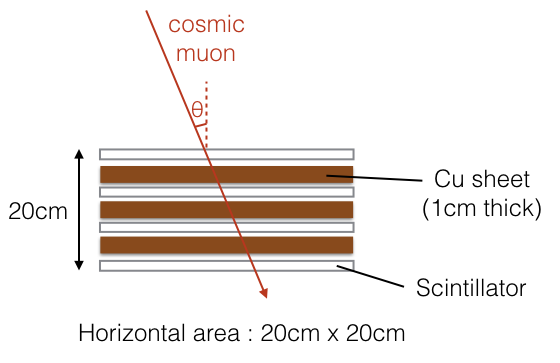
The experiment comprises 4 detection layers, each of which will produce a signal when a particle traverses the detector, separated by three sheets of copper, which will stop a fraction of muons, allowing a measurement of the muon lifetime to be made.

You can assume the detector has the following parameters :
* the efficiency of each of the 4 layers to detect a muon or electron is, from top to bottom : 55%, 60%, 85%, 50%.
* the probability of a cosmic ray muon to stop in 1cm of copper is $5\times10^{-3}$.
* electrons are emitted isotropically during decay of a stopped muon.
* decay electrons have energy 50 MeV and maximum path length of 1.8cm in copper.

In order to model the initial distribution of cosmic rays, we can assume the anuglar distribution is proportional to ${\rm cos}^2(\theta)$, for zenith angle $\theta$.  The overall normaliation can be taken from the intensity of _vertical_ muons to be 70 $m^{-2}s^{-1}sr^{-1}$. (See PDG review of cosmic rays : http://pdg.lbl.gov/2019/reviews/rpp2019-rev-cosmic-rays.pdf)


### 2a)
Using the model above, write code to simulate each muon that passes nearby the experiment. You will need to generate random numbers with appropriate distributions for the starting point and direction of each muon, and propagate each muon to the detector. You should generate further random numbers to model the stopping and decay process; ie. whether a muon stops in a given layer, and the direction of the decaying electron.

(Note that for the electron decay, you should generate points that are uniformly distributed on the unit sphere - simply generating two angles between 0 and $2\pi$ will _not_ give the correct distribution!)

You should discuss the design of your code in the text cell below.

Muon enters with
 Latitude:  0.2750028462524343 
Longitude:  4.723112880183463

The electron produced from the decayed muon has a 
position vector of:
 [0.01857734] i
 [-1.73226435] j
 0.4887894172681335 k.

The initial vector of the muon is:
 [-8.61754166] i, 
 [1.7731997] j, 
 -9.851974940447231 k

Electron stopped in the copper plate
33.3 ns ± 2.89 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


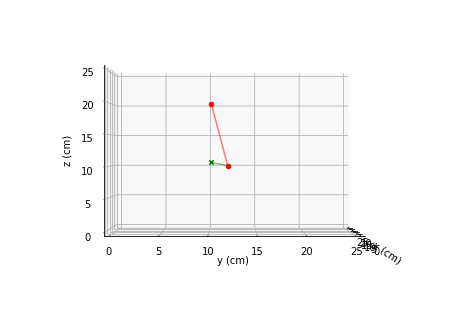

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, azim=0, elev=0)
ax.set_xlim(25, 0);plt.xlabel("x (cm)")
ax.set_ylim(0, 25);plt.ylabel("y (cm)")
ax.set_zlim(0, 25);ax.set_zlabel("z (cm)")

# DECAY LENGTH GENERATED
decay_length = np.random.random()
x_final = np.random.uniform(0, 20, size=1)
y_final = np.random.uniform(0, 20, size=1)
# top_plate_bot means z coordinate of the bottom of the highest copper plate
top_plate_bot = 20 - 10/3;  mid_plate_bot = 20/3 + 10/3;  bot_plate_bot = 10/3
top_plate_mid = (top_plate_bot + decay_length); mid_plate_mid = (mid_plate_bot + decay_length); bot_plate_mid = (bot_plate_bot + decay_length)
top_plate_top = (top_plate_bot + 1);  mid_plate_top = (mid_plate_bot + 1);  bot_plate_top = (bot_plate_bot + 1)


def muon_path(z_final):
    
    '''Displays the path of the muons initial and final poistions and the draws
    the line between this'''

    x_init = np.random.uniform(0, 20, size=1);    y_init = np.random.uniform(0, 20, size=1)
    z_init = 20

    x_path = [x_init, x_final];    y_path = [y_init, y_final];    z_path = [z_init, z_final]#x,y,z paths arrays created
    ax.scatter3D(x_init, y_init, z_init, marker='o', alpha=1, c='red')         #shows initial point on graph
    ax.scatter3D(x_final, y_final, z_final, marker='o', alpha=1, c='red')      #shows the final point
    ax.plot3D(x_path, y_path, z_path, c='red', alpha=0.5)                      #draws the path of the muon has travelled

    print("\nThe initial vector of the muon is:\n",
          (x_final - x_init), "i, \n", (y_final - y_init), "j, \n", (z_final - z_init), "k")
    return

def electron_coordinates(z_final, plate_bot, plate_top):
    
    '''Path of the electron starting from the final position of a muon within a 
    1.8cm sphere its path is mapped in blue then is either within the plate
    before decaying or escaping'''  
    radius = 1.8  #max radius (unit sphere) that the electron can travel in cm
    # RANDOM NUMBERS GENERATED FOR LONGITUDE AND LATITUDES
    u1 = np.random.random();    u2 = np.random.random()
    
    '''latitude values (Y-values) range between -pi/2 and +pi/2 
        longitude  (X-values) are between -180 and +180 degrees. 
        are written in terms of radians in sphereical 3D coordinates here'''
        
    latitude = np.arccos(2*u1 - 1) - (np.pi/2)
    longitude = 2*np.pi*u2
    
    print('Muon enters with\n','Latitude: ',latitude, '\nLongitude: ',longitude)

    x_s = radius*np.cos(latitude)*np.cos(longitude) + x_final
    y_s = radius*np.cos(latitude)*np.sin(longitude) + y_final
    z_s = radius*np.sin(latitude) + z_final
    ax.scatter3D(x_s, y_s, z_s, marker='x', alpha=1, c='green')

    decay_path_x = [x_s, x_final];    decay_path_y = [y_s, y_final];    decay_path_z = [z_s, z_final]
    diff_x = x_s - x_final;    diff_y = y_s - y_final;    diff_z = z_s - z_final

    print("\nThe electron produced from the decayed muon has a",
          "\nposition vector of:\n", diff_x, "i\n", diff_y, "j\n", diff_z, "k.")

    muon_path(z_final)#calling muon path function above

    ax.plot3D(decay_path_x, decay_path_y, decay_path_z, c='green', alpha=0.5)

    if z_s >= plate_bot and z_s <= plate_top:
        print("\nElectron stopped in the copper plate")
    else:
        print("\nElectron escapes copper plate")
    return (x_s, y_s, z_s, decay_path_x, decay_path_y, decay_path_z, diff_x, diff_y, diff_z)

def detection_a():
    (x_s, y_s, z_s, decay_path_x, decay_path_y, decay_path_z, diff_x, diff_y, diff_z) =  electron_coordinates(mid_plate_mid, mid_plate_bot, mid_plate_top)

detection_a()
% timeit(detection_a)

Using  a multiple functions the muons coordinates are randomly generated then converted into spherical coordinates then their path randomly generated and then the probability that their electron is emitted and if so if it is stopped by the copper plate

### 2b)
In the next cell you should validate your code.  The aim is to test separate parts of the code individually, to ensure the expected distributions or behaviour are produced in each case.


 25 Muons per unit time are incident on the detector



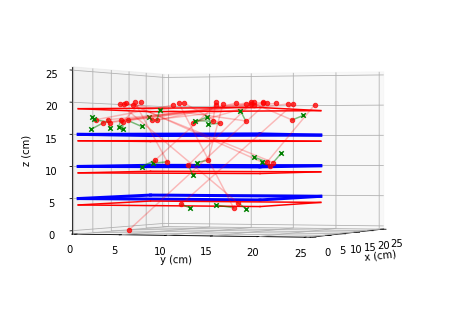

In [6]:
# 3D C00RDINATE SYSTEM CREATED & 3D PLOT CREATED WITH PLATES AND DETECTORS DRAWN IN
fig = plt.figure()
ax = Axes3D(fig, azim=20, elev=0)
zline = np.linspace(15, 15, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(15, 15, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(15, 15, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(15, 15, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)

#PLATE 2
zline = np.linspace(10, 10, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(10, 10, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(10, 10, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(10, 10, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)

#PLATE 3
zline = np.linspace(5, 5, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)#
zline = np.linspace(5, 5, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)#ax.plot3D(xline, yline, zline, 'o', color='orange')
zline = np.linspace(5, 5, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)
zline = np.linspace(5, 5, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'blue',linewidth=3)

#DETECTOR 1
zline = np.linspace(19, 19, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(19, 19, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(19, 19, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(19, 19, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'red')

#DETECTOR 2
zline = np.linspace(14, 14, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(14, 14, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(14, 14, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(14, 14, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'red')

#DETECTOR 3
zline = np.linspace(9, 9, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(9, 9, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(9, 9, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(9, 9, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'red')

#DETECTOR 4
zline = np.linspace(4, 4, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(0, 0, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(4, 4, 100);xline = np.linspace(0, 0, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(4, 4, 100);xline = np.linspace(20, 20, 100);yline = np.linspace(0, 20, 100)
ax.plot3D(xline, yline, zline, 'red')
zline = np.linspace(4, 4, 100);xline = np.linspace(0, 20, 100);yline = np.linspace(20, 20, 100)
ax.plot3D(xline, yline, zline, 'red')

ax.set_xlim(25, 0);plt.xlabel("x (cm)");    ax.set_ylim(0, 25);plt.ylabel("y (cm)");    ax.set_zlim(0, 25);ax.set_zlabel("z (cm)")

decay_length = np.random.random()# generating decay length

# top_plate_bot means z coordinate of the bottom of the highest copper plate
top_plate_bot = 20 - 10/3;  mid_plate_bot = 20/3 + 10/3;  bot_plate_bot = 10/3
top_plate_mid = (top_plate_bot + decay_length); mid_plate_mid = (mid_plate_bot + decay_length); bot_plate_mid = (bot_plate_bot + decay_length)
top_plate_top = (top_plate_bot + 1);  mid_plate_top = (mid_plate_bot + 1);  bot_plate_top = (bot_plate_bot + 1)

x_final = np.random.uniform(0, 20, size=1); y_final = np.random.uniform(0, 20, size=1)

@jit(nopython=True)
def refresher():
    # REFRESHERS THE PLATES TO ZERO
    n_stopped_plate1 = 0;    n_stopped_plate2 = 0;    n_stopped_plate3 = 0
    
    return n_stopped_plate1, n_stopped_plate2, n_stopped_plate3

#n_stopped_plate1, n_stopped_plate2, n_stopped_plate3 = refresher()

@jit(nopython=True)
def position():
    # SETS THE INITIAL & FINAL  POSITIONS FOR THE MUONS RANDOMLY
    x_init = np.random.uniform(0, 20, size=1);    y_init = np.random.uniform(0, 20, size=1)
    x_final = np.random.uniform(0, 20, size=1);    y_final = np.random.uniform(0, 20, size=1)
    z_init = 20

    return x_init, y_init, x_final, y_final, z_init


def path(z_final):
    # CREATES THE MUON PATHS & PLOTS THEM IN RED
    x_init, y_init, x_final, y_final, z_init = position() # calling previous function for muon positions

    x_path = [x_init, x_final];    y_path = [y_init, y_final];    z_path = [z_init, z_final]

    ax.scatter3D(x_final, y_final, z_final, marker='o', alpha=0.75, c='r')
    ax.scatter3D(x_init, y_init, z_init, marker='o', alpha=0.75, c='r')
    ax.plot3D(x_path, y_path, z_path, c='r', alpha=0.25)

    return x_init, y_init, x_final, y_final, z_init


def emission(plate_bot, plate_top):    
    #SETS THE PROBABILITY OF THE EMITTED ELECTRONS PATH/POISTION  
    global n_stopped_plate1, n_stopped_plate2, n_stopped_plate3
    
    decay_length = np.random.random()
    
    top_plate_mid = (top_plate_bot + decay_length);    mid_plate_mid = (mid_plate_bot + decay_length);    bot_plate_mid = (bot_plate_bot + decay_length)

    # PROBABILITY OF MUON DECAY & PROBABLITY OF IT HITTING A PLATE
    muon_decay = 5e-3
    hit_plate1 = np.random.uniform(4e-3, 6e-3);    hit_plate2 = np.random.uniform(4e-3, 6e-3);    hit_plate3 = np.random.uniform(4e-3, 6e-3)

    # PLATES CONDITIONS SET, CALLING PREVIOUS MUON PATH FUNCTION
    if hit_plate1 <= muon_decay:
        x_init, y_init, x_final, y_final, z_init = path(top_plate_mid)
        z_final = top_plate_mid
        n_stopped_plate1 += 1

    elif hit_plate2 <= muon_decay:
        x_init, y_init, x_final, y_final, z_init = path(mid_plate_mid)
        z_final = mid_plate_mid
        n_stopped_plate2 += 1

    elif hit_plate3 <= muon_decay:
        x_init, y_init, x_final, y_final, z_init = path(bot_plate_mid)
        z_final = bot_plate_mid
        n_stopped_plate3 += 1

    else:
        x_init, y_init, x_final, y_final, z_init = path(0)
        z_final = 0# end hit the plate


    radius = 1.8 # mean radius of emitted electron in cm

    # GENERATE RANDOM NUMBERS FOR LONGITUDE AND LATITUDE
    u1 = np.random.random();    u2 = np.random.random()
    
    latitude = np.arccos(2*u1 - 1) - (np.pi/2)
    longitude = 2*np.pi*u2
    
    # SPHERICAL COORDINATES
    x_s = radius*np.cos(latitude)*np.cos(longitude) + x_final
    y_s = radius*np.cos(latitude)*np.sin(longitude) + y_final
    z_s = radius*np.sin(latitude) + z_final

    #SETTING DECAY PATHS FOR ELECTRONS PLOTTING ON GRAPH
    decay_path_x = [x_s, x_final];    decay_path_y = [y_s, y_final];    decay_path_z = [z_s, z_final]    
    diff_x = x_s - x_final;    diff_y = y_s - y_final;    diff_z = z_s - z_final

    # MARKS IN GREEN THE ELECTRON
    if z_final != 0:
        ax.plot3D(decay_path_x, decay_path_y, decay_path_z, c='g', alpha=0.5)
        ax.scatter3D(x_s, y_s, z_s, marker='x', alpha=1, c='g')

    return (x_s, y_s, z_s, decay_path_x, decay_path_y, decay_path_z,diff_x, diff_y, diff_z, n_stopped_plate1, n_stopped_plate2, n_stopped_plate3)

def detection(N):
    # FIRST CALLS PREVIOUS FUNCTION
    # THEN SETS THE DETECTORS EFFIECENCIES & CREATES EMPTY ARRAYS
    for i in range(0, N):

        (x_sph, y_sph, z_sph, decay_path_x, decay_path_y, decay_path_z, diff_x, diff_y, diff_z, n_stopped_plate1, n_stopped_plate2, n_stopped_plate3) = emission(mid_plate_bot, mid_plate_top)

        eff_d1 = 0.55; eff_d2 = 0.60; eff_d3 = 0.85; eff_d4 = 0.50

        detect1_array = []; detect2_array = []; detect3_array = []; detect4_array = []

    # THIS FOR LOOP ASSIGNS EITHER A 0 OR 1, WHICH IS APPENDED TO OUR ARRAYS
    # THESE ARE LISTED FOR N MUONS AND WILL BE CONVERTED LATER USING np.unique
    for i in range(0, N):
        prob_pass_scint1 = np.random.random()
        if prob_pass_scint1 < eff_d1:
            detect1_array.append(1)  # detect1 = 1, Muon detected
        else:
            detect1_array.append(0) # detect1 = 0, Muon not detected

        prob_pass_scint2 = np.random.random()
        if prob_pass_scint2 < eff_d2:
            detect2_array.append(1)
        else:
            detect2_array.append(0)

        prob_pass_scint3 = np.random.random()
        if prob_pass_scint3 < eff_d3:
            detect3_array.append(1)
        else:
            detect3_array.append(0)

        prob_pass_scint4 = np.random.random()
        
        if prob_pass_scint4 < eff_d4:
            detect4_array.append(1)
        else:
            detect4_array.append(0)
    
    # UNIQUE IS USED TO SORT OUT THE LISTS OF 1'S & 0'S, WHERE N 1'S IS THE NUMBER OF DETECTIONS
    unique1, counts1 = np.unique(detect1_array, return_counts=True);unique2, counts2 = np.unique(detect2_array, return_counts=True)
    unique3, counts3 = np.unique(detect3_array, return_counts=True);unique4, counts4 = np.unique(detect4_array, return_counts=True)

    bar_x_axis = ["Scintillator 1", "Scintillator 2", "Scintillator 3", "Scintillator 4"]
    bar_y_axis = []

    # HERE FACTORS IN THE MUONS THAT HAVE DECAYED FROM THE DETECTED
    # FOLLOWED BY A CHECK ISN'T ZERO OR NEGATIVE
    if detect2_array == []:
        bar_y_axis = [(N - counts1[0]), 0, 0, 0]
    elif detect3_array == []:
        bar_y_axis = [(N - counts1[0]), (N - counts2[0] - n_stopped_plate1), 0, 0]
    elif detect4_array == []:
        bar_y_axis = [(N - counts1[0]), (N - counts2[0] - n_stopped_plate1),
                      (N - counts3[0] - n_stopped_plate1 - n_stopped_plate2, 0)]
    else:

        bar_y_axis = [(N - counts1[0]), (N - counts2[0] - n_stopped_plate1),
                      (N - counts3[0] - n_stopped_plate1 - n_stopped_plate2),
                      (N - counts4[0] - n_stopped_plate1 - n_stopped_plate2 - n_stopped_plate3)]
    # PREVENTS NEGATIVES ON Y AXIS OF BAR CHART
    for i in range(0, 4):
        if bar_y_axis[i] < 0:
            bar_y_axis[i] = 0

    print("\n",N, "Muons per unit time are incident on the detector\n")

    return (bar_x_axis, bar_y_axis, n_stopped_plate1, n_stopped_plate2, n_stopped_plate3)
    
#-------------------------------------------------------------------------- shows 3d plot
n_stopped_plate1, n_stopped_plate2, n_stopped_plate3 = refresher()
detection(25)
plt.show()

### 2c)
Now, use your simulation to estimate :
* The total rate of muons that pass through the detector.
* The fraction of those muons which are registered in 1, 2, 3 or 4 scintillator planes of the detector. 
* The fraction of those muons which decay and produce an electron that can be detected in an adjacent scintillator layer.


 1000 Muons per unit time are incident on the detector

[524, 92, 106, 0]


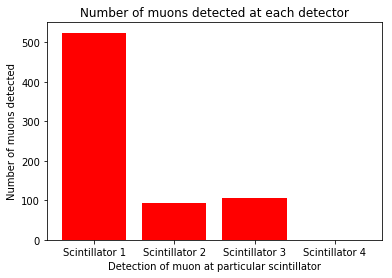



   Detector  Effiecency  Ratio of Muons detected
0         1        0.55                    0.524
1         2        0.60                    0.092
2         3        0.85                    0.106
3         4        0.50                    0.000




In [7]:
def bar_chart(N):

    (bar_x_axis, bar_y_axis, n_stopped_plate1, n_stopped_plate2, n_stopped_plate3) = detection(N)
    print(bar_y_axis)

    plt.bar(bar_x_axis, bar_y_axis, color='red')
    plt.title('Number of muons detected at each detector')
    plt.xlabel("Detection of muon at particular scintillator")
    plt.ylabel("Number of muons detected")
    plt.show()    
    
    table = pd.DataFrame({'Detector':[1,2,3,4],'Effiecency':[0.55, 0.60, 0.85, 0.50],
                          'Ratio of Muons detected':[(bar_y_axis[0]/N),(bar_y_axis[1]/N),(bar_y_axis[2]/N),(bar_y_axis[3]/N)]})
    print("\n")
    print(table)
    print("\n")
#-------------------------------------------------------------------------shows bar chart and table
n_stopped_plate1, n_stopped_plate2, n_stopped_plate3 = refresher()
bar_chart(1000)


Scintillator 4 only detects muons when roughly 500 000+ are incident on the program. When changing the anle of viewing the lower down the plate observed the more central muons are detected ( not in the corners)


This question is well suited to extensions. For example, a negative muon stopping in the Copper may be "captured" by an atomic nucleus, which modifies its lifetime (to ~0.164 $\mu s$). Positive muons are not captured and hence their lifetime is unaffected. You can simulate this, to estimate the expected distribution of muon decay times.  (An even more detailed simulation could include muons that stop in scintillator...)

Feel free to discuss possible extensions with your demonstrator and/or the unit director !

## Q3 - Statistical Analysis

In this question, we will explore the use of Monte Carlo methods to understand experiment outcomes.

Standard experimental error analysis frequently uses the assumption that uncertainties are normally distributed. The interpretation of a result quoted as $\mu \pm \sigma$ is taken that the true value lies within the range [$(\mu - \sigma$),$(\mu + \sigma)$] with a certain probability (usually 68%). However, it is not hard to find cases where these assumptions break. A classic example occurs when measuring a parameter that is close to a physical boundary - the standard error treatment may result in a range of values that includes the non-physical region.

A more sophisticated approach is to treat the measurement process as an inverse problem, ie. the inference of model parameters from experimental measurements. (For example, estimation of G from observations of planetary motion). Given a model, we can use Monte Carlo techniques to generate ensembles of "pseudo-experiments", and build up distributions of experimental outcomes for a given set of model parameters. Then it is straightforward to find the range of model parameters that cover an actual experimental observation, within a specified probability.

### 3a)

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 nb^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the counting experiment is 6.

You should write a Monte Carlo programme that will calculate the upper limit on the signal cross section that is compatible with the observation at 95% confidence level.

You will need to generate pseudo-experiments for a range of different signal cross sections. For each pseudo-experiment, generate random numbers to model the Gaussian uncertainty on the background prediction, and the Poisson variation in both the background and signal production. Ensure that the number of pseudo-experiments are sufficient to measure the experimental distribution for each cross section, and in particular the fraction of the distribution that is _greater_ than the measured value (the confidence level).

How would you incorporate additional uncertainties?  For example, if the uncertainty on the luminosity is 5%, or the efficiency to identify signal events is estimated to be $0.7 \pm 0.1$ ?

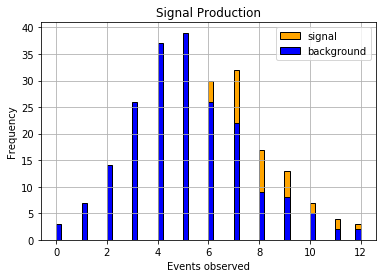

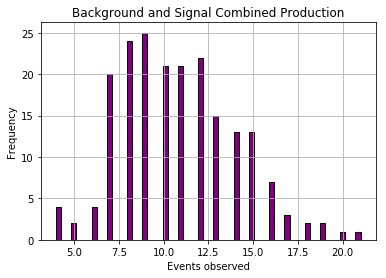

Confidence:  95.0 %
Signal cross section:  0.5597999999999547
Time:  3.7505669593811035 seconds
35.9 ns ± 3.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [8]:
import numpy as np 
import time 
import matplotlib.pyplot as plt
import statistics

def poisson(iterations):
    #TIMER
    start = time.time()
    #EMPTY LISTS- background, signal, combination of background and signal 
    background, signal, combination = [],[],[]
#    background = signal = combination = []
    #DEFINING BOTH GAUSSIAN & POISSON DISTRIBUTIONS 
    for i in range(0, iterations, 1):
        #UNCERTAINTIES AS STANDARD DEVIATIONS OF GAUSSIAN
        L = np.random.normal(10, 0.05) #mean & standard deviation of luminosity
        X = np.random.normal(4.8, 0.5) #mean & standard deviation of background
        
        sigma = 0.0001 #STARTING CROSS-SECTION
        hypo = L * sigma
        
        background.append(np.random.poisson(X)) #APPEND NEW VALUES TO EXISTING BACKGROUND LIST/ARRAY, X = Expectation of interval ~ Lambda
               
    signal = np.random.poisson(hypo, size = iterations) #LUMINOSITY SIGNAL
    combination = np.add(background, signal) #ADDITION OF BOTH SIGNALS
    
    #NUMBER OF EVENTS > 6, CONFIDENCE LEVEL DEFINED
    confidence = len(combination[np.where(combination > 6)]) # len returns the number of items in an object, np.where returns values that are true for the condition
            
    while confidence < 0.95*iterations:
    #RANGE OF INCREASING CROSS SECTIONS         
        sigma += 0.0001
        
        for i in range(0, iterations, 1):      
            L = np.random.normal(10, 0.05)
            hypo = L * sigma
                    
        signal = np.random.poisson(hypo, size = iterations)
        combination = background + signal
        confidence = len(combination[np.where(combination > 6)])
    end = time.time()
    
    plt.hist(signal, bins = 60, color = 'orange', edgecolor = 'black', label = 'signal')
    plt.hist(background, bins = 60, color = 'blue', edgecolor = 'black', label = 'background')
    plt.title("Signal Production")
    plt.xlabel('Events observed')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.title("Background and Signal Combined Production")
    plt.xlabel('Events observed')
    plt.ylabel('Frequency')        
    plt.hist(combination, bins = 60, edgecolor = 'black', color = 'purple')
    plt.grid()
    plt.show()
    
    print('Confidence: ', (confidence/iterations)*100, '%')
    print('Signal cross section: ', sigma)    
    print("Time: ", end-start,"seconds") 
    
    return

poisson(200)# VARIABLE NUMBER OF ITERATION ~ best results 5000

% timeit poisson

The background compared to the other signal both show poission distributions for low number of iterations the higher iterations the more bell/gaussian symmetric shape is seen. The back ground seen in blue is is closer to the origin(left) compared to the other signal as seen in orange.The combintations(seen in purple)

-----------------------------------------------------------------------------

discuss methods of speeding it up:
-NUMBA module look into speed up (by converting into C and then back to python)
-Vectorization speeds up too.
-removing loops and using alternatives 

------------------------------------------------------------------------------------
Different iterartions below, their CPU time, confidence and cross section:
-----------------------------------------------------------------------------------------

Confidence:  100.0 %
Signal cross section:  0.32849999999998014
Time:  0.6971766948699951 seconds
Iterartion 10

Confidence:  95.0 %
Signal cross section:  0.5720999999999533
Time:  4.3995420932769775 seconds
Iteration 100

Confidence:  95.19999999999999 %
Signal cross section:  0.6460999999999452
Time:  45.373998403549194 seconds
Iteration 1000

Confidence:  95.03 %
Signal cross section:  0.6962999999999396
Time:  477.9010055065155 seconds
Iterations 10 000

Confidence:  95.02000000000001 %
Signal cross section:  0.6947999999999398
Time:  582.9274616241455 seconds
Iterations: 100 000

--------------------------------------------------------------------------------
So as the number of iterations increases the cross section approaches 0.7 (limit) as seen on the graph below.
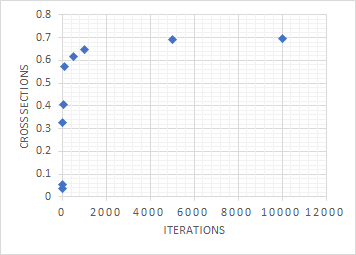

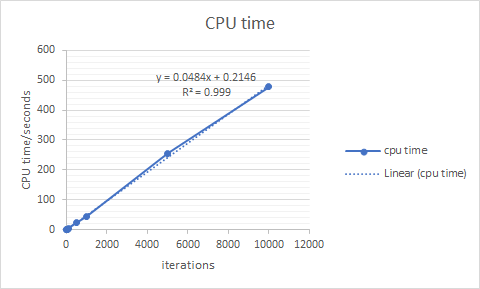
CPU time compared to iterations

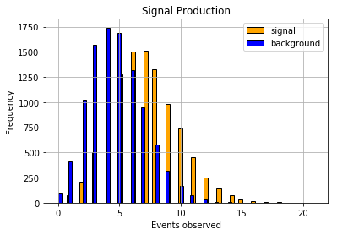

10 000 iterations

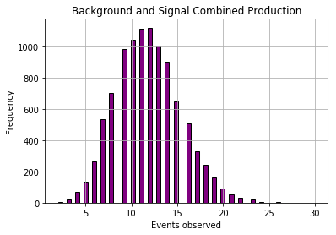
10 000 iterations